# Car's speed prediction using transfer learning 

In this project we will use optical flow to estimate speed of a car using front camera images.
previous method for training longs too many time. Instead of that, we can pass our training and validation data (optical flow) through pre-trained model and save feature maps. Then we can train a classifier/regressor using those feature maps

In [1]:
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec
from sklearn.utils import shuffle
import os

import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
# img_path = []
# for i in range(20400):
#     img_path.append('data/IMG/'+str(i)+'.jpg')

In [3]:
# F = open('./data/train.txt', 'r')
# ground_truth = [x[:-2] for x in F.readlines()]
# print(len(ground_truth))

In [4]:
# time = np.arange(0, 1020, 0.05)
# time.shape

In [5]:
# df = pd.DataFrame({'image_path': img_path,
#                    'speed': ground_truth,
#                    'time': time})

In [6]:
# df

In [7]:
df = pd.read_csv('./test_suite/data/driving.csv')
df

,image_path,time,speed
0,./test_suite/data/IMG/0.0046617984771728516.jpg,0.004662,2.022715
1,./test_suite/data/IMG/0.06979799270629883.jpg,0.069798,2.040872
2,./test_suite/data/IMG/0.1299138069152832.jpg,0.129914,2.062394
3,./test_suite/data/IMG/0.22664284706115723.jpg,0.226643,2.076283
4,./test_suite/data/IMG/0.2913668155670166.jpg,0.291367,2.077074
5,./test_suite/data/IMG/0.34787487983703613.jpg,0.347875,2.070870
6,./test_suite/data/IMG/0.3938179016113281.jpg,0.393818,2.107572
7,./test_suite/data/IMG/0.461500883102417.jpg,0.461501,2.122324
8,./test_suite/data/IMG/0.5268487930297852.jpg,0.526849,2.127576
9,./test_suite/data/IMG/0.5937719345092773.jpg,0.593772,2.123339


shape of images: (480, 640, 3)


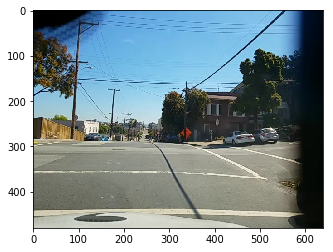

In [8]:
im =mpimg.imread(df['image_path'][0])
print('shape of images:', im.shape)
plt.imshow(im)

#### Plot Speeds vs Time

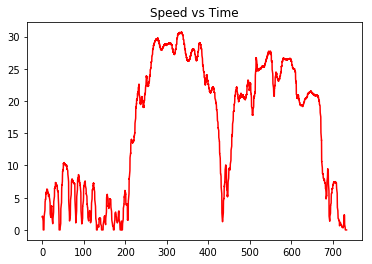

In [9]:
times = np.asarray(df['time'], dtype = np.float32)
speeds = np.asarray(df['speed'], dtype=np.float32)
plt.plot(times, speeds, 'r-')
plt.title('Speed vs Time')
plt.show()

### Shuffle Pairs and Train Test Split
In this function we will select 2 sequencial frames and assign them to train with probability of 80% and to validation with probability of 20%.  

In [10]:
def batch_shuffle(dframe):
    """
    Randomly shuffle pairs of rows in the dataframe, separates train and validation data
    generates a uniform random variable 0->9, gives 20% chance to append to valid data, otherwise train_data
    return tuple (train_data, valid_data) dataframes
    """
    train_data = pd.DataFrame()
    valid_data = pd.DataFrame()
    for i in range(len(dframe) - 1):
        idx1 = np.random.randint(len(dframe) - 1)
        idx2 = idx1 + 1
        
        row1 = dframe.iloc[[idx1]].reset_index()
        row2 = dframe.iloc[[idx2]].reset_index()
        
        randInt = np.random.randint(9)
        if 0 <= randInt <= 1:
            valid_frames = [valid_data, row1, row2]
            valid_data = pd.concat(valid_frames, axis = 0, join = 'outer', ignore_index=False)
        if randInt >= 2:
            train_frames = [train_data, row1, row2]
            train_data = pd.concat(train_frames, axis = 0, join = 'outer', ignore_index=False)
    return train_data, valid_data


In [11]:
train_data, valid_data = batch_shuffle(df)

In [12]:
print('valid_data: ', len(valid_data))
print('train_data: ', len(train_data))

valid_data:  3998
train_data:  13232


In [13]:
train_data.head(5)

,index,image_path,time,speed
0,4201,./test_suite/data/IMG/322.46814799308777.jpg,322.468148,28.651070
0,4202,./test_suite/data/IMG/322.5460858345032.jpg,322.546086,28.628560
0,1438,./test_suite/data/IMG/103.04345393180847.jpg,103.043454,7.422292
0,1439,./test_suite/data/IMG/103.10113382339478.jpg,103.101134,7.484218
0,4812,./test_suite/data/IMG/376.70026683807373.jpg,376.700267,27.936384


## Preprocess

In [14]:
def change_brightness(image, bright_factor):
    """
    Augments the brightness of the image by multiplying the saturation by a uniform random variable
    Input: image (RGB)
    returns: image with brightness augmentation
    """
    
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    # perform brightness augmentation only on the second channel
    hsv_image[:,:,2] = hsv_image[:,:,2] * bright_factor
    
    # change back to RGB
    image_rgb = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB)
    return image_rgb

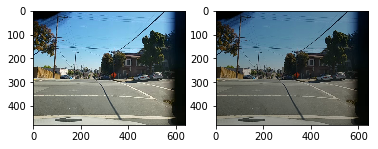

In [15]:
im =mpimg.imread(df['image_path'][0])
aug_im = change_brightness(im, 0.7)
plt.subplot(1,2,1)
plt.imshow(im)
plt.subplot(1,2,2)
plt.imshow(aug_im)

### Optical Flow Dense
* Two strategies
* Strategy 1: get optical flow ang, magnitude, convert HSV to RGB and throw that image into the network
* Strategy 2: get optical flow ang, magnitude, convert HSV to RGB then overlay ontop of original image and throw that into the network as RGB
* Strategy 3: get optical flow parameters, ang, magnitude and expand dimensions of original image so you throw H x W x R x G x B x Ang x Magnitude into the network
* Strategy 4: send in the flow differences as RGB (applied here)

In [16]:
def opticalFlowDense(image_current, image_next):
    """
    input: image_current, image_next (RGB images)
    calculates optical flow magnitude and angle and places it into HSV image
    * Set the saturation to the saturation value of image_next
    * Set the hue to the angles returned from computing the flow params
    * set the value to the magnitude returned from computing the flow params
    * Convert from HSV to RGB and return RGB image with same size as original image
    """
    gray_current = cv2.cvtColor(image_current, cv2.COLOR_RGB2GRAY)
    gray_next = cv2.cvtColor(image_next, cv2.COLOR_RGB2GRAY)
    
    hsv = np.zeros((340, 550, 3))
    # set saturation
#     hsv[:,:,1] = cv2.cvtColor(image_next, cv2.COLOR_RGB2HSV)[:,:,1]
    
    # set saturation to 255
    hsv[:,:,1] = 255
 
    # Flow Parameters
#     flow_mat = cv2.CV_32FC2
    flow_mat = None
    image_scale = 0.5
    nb_images = 1
    win_size = 15
    nb_iterations = 2
    deg_expansion = 5
    STD = 1.3
    extra = 0

    # obtain dense optical flow paramters
    flow = cv2.calcOpticalFlowFarneback(gray_current, gray_next,  
                                        flow_mat, 
                                        image_scale, 
                                        nb_images, 
                                        win_size, 
                                        nb_iterations, 
                                        deg_expansion, 
                                        STD, 
                                        0)
                                        
        
    # convert from cartesian to polar
    mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])  
        
    # hue corresponds to direction
    hsv[:,:,0] = ang * (180/ np.pi / 2)
    
    # value corresponds to magnitude
    hsv[:,:,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
    
    # convert HSV to float32's
    hsv = np.asarray(hsv, dtype= np.float32)
    rgb_flow = cv2.cvtColor(hsv,cv2.COLOR_HSV2RGB)

    
    return rgb_flow

### Expand dims to add optical flow

In [17]:
def preprocess_image(image):
    """
    preprocesses the image
    
    input: image (480 (y), 640 (x), 3) RGB
    output: image (shape is (220, 66, 3) as RGB)
    
    This stuff is performed on my validation data and my training data
    Process: 
             1) Cropping out black spots
             3) resize to (220, 66, 3) if not done so already from perspective transform
    """
    # Crop out sky (top) (100px) and black right part (-90px)
    image_cropped = image[100:440, :-90] # -> (340, 550, 3)
    
    image = cv2.resize(image_cropped, (220, 66), interpolation = cv2.INTER_AREA)
        
    return image_cropped

In [18]:
def preprocess_image_valid_from_path(image_path, speed):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = preprocess_image(img)
    return img, speed

In [19]:
def preprocess_image_from_path(image_path, speed, bright_factor):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = change_brightness(img, bright_factor)    
    img = preprocess_image(img)
    return img, speed

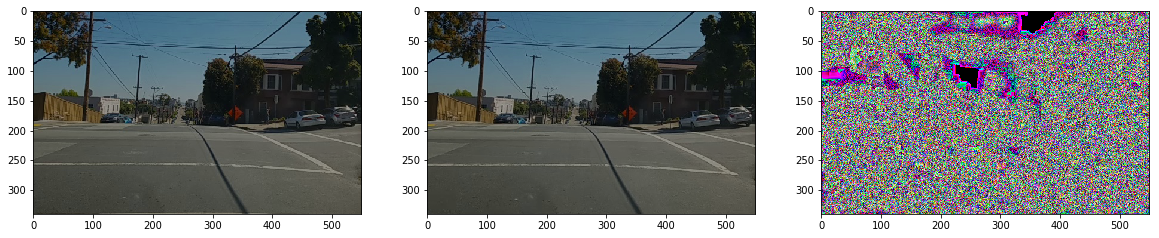

In [20]:
im1,_ = preprocess_image_from_path(df['image_path'][0],df['speed'][0], 0.6)
im2,_ = preprocess_image_from_path(df['image_path'][1],df['speed'][1], 0.6)
im_opt_flow = opticalFlowDense(im1, im2)
plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.imshow(im1)
plt.subplot(1,3,2)
plt.imshow(im2)
plt.subplot(1,3,3)
plt.imshow(im_opt_flow)

### Generators

#### Train Generator
* This is used to yield train batches of rgb_flow and average speed. 
* We pick a random spot in the training dataset, between 1 and length - 1
* determine the relationship between 3 frames
* locate the current_frame and the next_frame
* Take the rgb_flow and the average speed and build batches with that information
* Then shuffle the batch and yield it, which will then be fed into the network
* Generators allow us to not clog our memory stack so we can perform these operations on 16 (`BATCH` size) at a time. Note: We process 32 images each time the generator runs. If we run 8 epochs and 20480 samples per epoch we are processing 8 x 20480 x 32 = 5.2M images total.

In [48]:
def generate_training_data(data):
#     image_batch = np.zeros((batch_size, 66, 220, 3)) # nvidia input params
#     label_batch = np.zeros((batch_size))
    while True:
        for idx in range(1, len(data)-1):
            # because we want to save bottle neck features, we do not randomize data
            
            # Generate a random bright factor to apply to both images
            bright_factor = 0.4 + np.random.uniform()   # 0.2
            
            row_now = data.iloc[[idx]].reset_index()
            row_prev = data.iloc[[idx - 1]].reset_index()
            row_next = data.iloc[[idx + 1]].reset_index()
            
            # Find the 3 respective times to determine frame order (current -> next)
            
            time_now = row_now['time'].values[0]
            time_prev = row_prev['time'].values[0]
            time_next = row_next['time'].values[0]
            
            if time_now - time_prev > 0 and 0.0000001 < time_now - time_prev < 0.58: # 0.578111 is highest diff i have seen
                # in this case row_prev is x1 and row_now is x2
                row1 = row_prev
                row2 = row_now
                
            elif time_next - time_now > 0 and 0.0000001 < time_next - time_now < 0.58:
                # in this case row_now is x1 and row_next is x2
                row1 = row_now
                row2 = row_next
                
                # Use this to find outliers
            else:
                print('time_now is not next or prev: ', time_now)
                print('time_prev is :', time_prev)
                print('time_next is: ', time_next)
                
                print('\n diff: now  - prev \t', time_now - time_prev)
                print('\n diff: next - now: \t', time_next - time_now)
            
            
            x1, y1 = preprocess_image_from_path(row1['image_path'].values[0],
                                                row1['speed'].values[0],
                                               bright_factor)
            
#             print(row1['image_path'].values[0], row1['speed'].values[0])
            
            # preprocess another image
            x2, y2 = preprocess_image_from_path(row2['image_path'].values[0], 
                                                row2['speed'].values[0],
                                               bright_factor)
            
#             print(row2['image_path'].values[0], row2['speed'].values[0])   
        
            # compute optical flow send in images as RGB
            rgb_diff = opticalFlowDense(x1, x2)
            
            rgb_diff_resized = cv2.resize(rgb_diff, (220, 66), interpolation = cv2.INTER_AREA)
            rgb_diff_resized = rgb_diff_resized.reshape(1, rgb_diff_resized.shape[0], rgb_diff_resized.shape[1], rgb_diff_resized.shape[2])
            # calculate mean speed
#             y1 = float(y1)
#             y2 = float(y2)
#             y = np.mean([y1, y2])
#             label_batch[i] = y
            
            yield rgb_diff_resized

#### Validation Generator
* This is used to yield validation rgb_flow and average speed. 
* We pick iterate through the validation data, determine the relationship between 3 frames, locate the current_frame and the next_frame. Take the rgb_flow and their average speed and feed that into the network
* Reshape by adding an additional dimensions so the network perceives we are using a batch size of 1

In [45]:
def generate_validation_data(data):
    while True:
        for idx in range(1, len(data) - 1): # start from the second row because we may try to grab it and need its prev to be in bounds
            row_now = data.iloc[[idx]].reset_index()
            row_prev = data.iloc[[idx - 1]].reset_index()
            row_next = data.iloc[[idx + 1]].reset_index()
            
            # Find the 3 respective times to determine frame order (current -> next)
            
            time_now = row_now['time'].values[0]
            time_prev = row_prev['time'].values[0]
            time_next = row_next['time'].values[0]
            
            if time_now - time_prev > 0 and 0.0000001 < time_now - time_prev < 0.58:
                # in this case row_prev is x1 and row_now is x2
                row1 = row_prev
                row2 = row_now
                
            elif time_next - time_now > 0 and 0.000001 < time_next - time_now < 0.58:
                # in this case row_now is x1 and row_next is x2
                row1 = row_now
                row2 = row_next
            
            x1, y1 = preprocess_image_valid_from_path(row1['image_path'].values[0], row1['speed'].values[0])
            x2, y2 = preprocess_image_valid_from_path(row2['image_path'].values[0], row2['speed'].values[0])
            
            img_diff = opticalFlowDense(x1, x2)
            img_diff = cv2.resize(img_diff, (220, 66), interpolation = cv2.INTER_AREA)
            img_diff = img_diff.reshape(1, img_diff.shape[0], img_diff.shape[1], img_diff.shape[2])
#             img_diff = np.reshape(img_diff, (img_diff.shape[0], img_diff.shape[1], img_diff.shape[2]))
    
#             y1 = float(y1)
#             y2 = float(y2)
#             y = np.mean([y1, y2])
            
#             speed = np.array([[y]])
            yield img_diff

# Pre-trained vgg Model

Here we will use pre-trained vgg16 and transfer learning to do our job. We use vgg16 bottleneck features and train a regressor on top of that. You can download vgg16 pre-trained weights from here: 
- https://gist.github.com/baraldilorenzo/07d7802847aaad0a35d3

In [23]:
from keras.models import Sequential, Model
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.core import Activation, Dropout, Flatten, Dense, Lambda
from keras.layers import ELU, Input, GlobalAveragePooling2D
from keras.optimizers import Adam
import keras.backend.tensorflow_backend as KTF
import keras.applications as applications

Using TensorFlow backend.


In [41]:
# dimensions of our images.
img_width, img_height = 220, 66

top_model_weights_path = 'vgg16_weights.h5'
batch_size = 32
nb_train_samples = train_data.shape[0]
nb_validation_samples = valid_data.shape[0]

In [42]:
model_vgg16_conv = applications.VGG16(include_top=False, weights='imagenet')

In [43]:
model_vgg16_conv.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_3 (InputLayer)             (None, None, None, 3) 0                                            
____________________________________________________________________________________________________
block1_conv1 (Convolution2D)     (None, None, None, 64 1792        input_3[0][0]                    
____________________________________________________________________________________________________
block1_conv2 (Convolution2D)     (None, None, None, 64 36928       block1_conv1[0][0]               
____________________________________________________________________________________________________
block1_pool (MaxPooling2D)       (None, None, None, 64 0           block1_conv2[0][0]               
___________________________________________________________________________________________

In [51]:
def save_bottlebeck_features():

    valid_generator = generate_validation_data(valid_data)
    train_generator = generate_training_data(train_data)
    
    bottleneck_features_train = model_vgg16_conv.predict_generator(
        train_generator, nb_train_samples)
    np.save('bottleneck_features_train.npy', bottleneck_features_train)

    bottleneck_features_validation = model_vgg16_conv.predict_generator(
        valid_generator, nb_validation_samples)
    np.save('bottleneck_features_validation.npy', bottleneck_features_validation)

In [52]:
save_bottlebeck_features()

In the following part we will train our regressor.

In [60]:
def generate_labels(data):
    labels = []
    for idx in range(1, len(data)-1):
        # because we want to save bottle neck features, we do not randomize data
        row_now = data.iloc[[idx]].reset_index()
        row_prev = data.iloc[[idx - 1]].reset_index()
        row_next = data.iloc[[idx + 1]].reset_index()

        # Find the 3 respective times to determine frame order (current -> next)

        time_now = row_now['time'].values[0]
        time_prev = row_prev['time'].values[0]
        time_next = row_next['time'].values[0]

        if time_now - time_prev > 0 and 0.0000001 < time_now - time_prev < 0.58: # 0.578111 is highest diff i have seen
            # in this case row_prev is x1 and row_now is x2
            row1 = row_prev
            row2 = row_now

        elif time_next - time_now > 0 and 0.0000001 < time_next - time_now < 0.58:
            # in this case row_now is x1 and row_next is x2
            row1 = row_now
            row2 = row_next

            # Use this to find outliers
        else:
            print('time_now is not next or prev: ', time_now)
            print('time_prev is :', time_prev)
            print('time_next is: ', time_next)

            print('\n diff: now  - prev \t', time_now - time_prev)
            print('\n diff: next - now: \t', time_next - time_now)


        y1 = row1['speed'].values[0]
        y2 = row2['speed'].values[0]

        y1 = float(y1)
        y2 = float(y2)
        y = np.mean([y1, y2])
        labels.append(y)

    return np.array(labels)

In [83]:
def train_top_model():
    
    model = Sequential()
    model.add(Flatten(input_shape=train_features.shape[1:]))
    model.add(Dense(256, activation=ELU()))
    model.add(Dropout(0.5))
#     model.add(Dense(256, activation=ELU()))
#     model.add(Dropout(0.5))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mse')
    
    model.fit(train_features, train_labels, 
              nb_epoch=1000,
              batch_size=batch_size,
              validation_data=(validation_features, validation_labels))
    model.save_weights('top_model_weights.h5')

model.save_weights('vgg16_transferlearning_55.h5')

In [70]:
train_features = np.load('bottleneck_features_train.npy')
train_features = train_features[1:-1]
print('train features shape:', train_features.shape)
train_labels = generate_labels(train_data)
print('train labels shape:', train_labels.shape)

validation_features = np.load('bottleneck_features_validation.npy')
validation_features = validation_features[1:-1]
print('validation fetures shape:', validation_features.shape)
validation_labels = generate_labels(valid_data)
print('validation labels shape:', validation_labels.shape)

train features shape: (13230, 2, 6, 512)
train labels shape: (13230,)
validation fetures shape: (3996, 2, 6, 512)
validation labels shape: (3996,)


In [84]:
train_top_model()

Train on 13230 samples, validate on 3996 samples
Epoch 1/1000
13230/13230 [==============================] - 5s - loss: 211471.9856 - val_loss: 682.3755
Epoch 2/1000
13230/13230 [==============================] - 5s - loss: 2204.4274 - val_loss: 217.4791
Epoch 3/1000
13230/13230 [==============================] - 4s - loss: 394.1627 - val_loss: 157.4427
Epoch 4/1000
13230/13230 [==============================] - 4s - loss: 219.4627 - val_loss: 141.9811
Epoch 5/1000
13230/13230 [==============================] - 4s - loss: 210.3520 - val_loss: 138.3458
Epoch 6/1000
13230/13230 [==============================] - 5s - loss: 138.8837 - val_loss: 133.2034
Epoch 7/1000
13230/13230 [==============================] - 5s - loss: 134.5578 - val_loss: 126.3276
Epoch 8/1000
13230/13230 [==============================] - 4s - loss: 127.0575 - val_loss: 123.6781
Epoch 9/1000
13230/13230 [==============================] - 4s - loss: 125.4375 - val_loss: 121.5925: 125
Epoch 10/1000
13230/13230 [======

13230/13230 [==============================] - 4s - loss: 107.8014 - val_loss: 114.6134
Epoch 81/1000
13230/13230 [==============================] - 4s - loss: 114.9387 - val_loss: 115.5307
Epoch 82/1000
13230/13230 [==============================] - 4s - loss: 107.5423 - val_loss: 113.1393
Epoch 83/1000
13230/13230 [==============================] - 4s - loss: 107.8818 - val_loss: 114.9801
Epoch 84/1000
13230/13230 [==============================] - 4s - loss: 107.6389 - val_loss: 113.4381
Epoch 85/1000
13230/13230 [==============================] - 4s - loss: 107.8550 - val_loss: 109.9768
Epoch 86/1000
13230/13230 [==============================] - 4s - loss: 107.5796 - val_loss: 108.5743
Epoch 87/1000
13230/13230 [==============================] - 4s - loss: 107.6570 - val_loss: 109.1182
Epoch 88/1000
13230/13230 [==============================] - 4s - loss: 107.7260 - val_loss: 110.8268
Epoch 89/1000
13230/13230 [==============================] - 4s - loss: 107.5097 - val_loss: 108

13230/13230 [==============================] - 4s - loss: 107.5924 - val_loss: 109.2942
Epoch 160/1000
13230/13230 [==============================] - 4s - loss: 107.3735 - val_loss: 110.3735
Epoch 161/1000
13230/13230 [==============================] - 4s - loss: 107.6807 - val_loss: 109.3256
Epoch 162/1000
13230/13230 [==============================] - 4s - loss: 107.2601 - val_loss: 108.7859
Epoch 163/1000
13230/13230 [==============================] - 4s - loss: 107.6077 - val_loss: 109.4770
Epoch 164/1000
13230/13230 [==============================] - 4s - loss: 107.5075 - val_loss: 109.0817
Epoch 165/1000
13230/13230 [==============================] - 4s - loss: 107.4838 - val_loss: 110.0746
Epoch 166/1000
13230/13230 [==============================] - 4s - loss: 107.5387 - val_loss: 110.5241
Epoch 167/1000
13230/13230 [==============================] - 4s - loss: 107.6770 - val_loss: 110.0734
Epoch 168/1000
13230/13230 [==============================] - 4s - loss: 107.5433 - val_

13230/13230 [==============================] - 4s - loss: 107.3857 - val_loss: 113.0822
Epoch 239/1000
13230/13230 [==============================] - 4s - loss: 107.4995 - val_loss: 110.7488
Epoch 240/1000
13230/13230 [==============================] - 4s - loss: 107.3988 - val_loss: 110.1233
Epoch 241/1000
13230/13230 [==============================] - 4s - loss: 107.3722 - val_loss: 110.9631
Epoch 242/1000
13230/13230 [==============================] - 4s - loss: 107.5147 - val_loss: 111.3988: 1
Epoch 243/1000
13230/13230 [==============================] - 4s - loss: 107.3773 - val_loss: 110.9496
Epoch 244/1000
13230/13230 [==============================] - 4s - loss: 107.3859 - val_loss: 110.9456
Epoch 245/1000
13230/13230 [==============================] - 4s - loss: 107.7541 - val_loss: 109.6076
Epoch 246/1000
13230/13230 [==============================] - 4s - loss: 107.4343 - val_loss: 109.6579
Epoch 247/1000
13230/13230 [==============================] - 4s - loss: 107.4481 - v

13230/13230 [==============================] - 4s - loss: 107.2996 - val_loss: 109.7995
Epoch 318/1000
13230/13230 [==============================] - 4s - loss: 107.5505 - val_loss: 108.7033
Epoch 319/1000
13230/13230 [==============================] - 4s - loss: 107.1613 - val_loss: 108.3952
Epoch 320/1000
13230/13230 [==============================] - 4s - loss: 107.3567 - val_loss: 107.8447
Epoch 321/1000
13230/13230 [==============================] - 4s - loss: 107.2581 - val_loss: 110.2552
Epoch 322/1000
13230/13230 [==============================] - 4s - loss: 107.2261 - val_loss: 109.8871
Epoch 323/1000
13230/13230 [==============================] - 4s - loss: 107.6182 - val_loss: 112.9500
Epoch 324/1000
13230/13230 [==============================] - 4s - loss: 107.5812 - val_loss: 111.6620
Epoch 325/1000
13230/13230 [==============================] - 4s - loss: 107.4590 - val_loss: 110.5422
Epoch 326/1000
13230/13230 [==============================] - 4s - loss: 107.5080 - val_

13230/13230 [==============================] - 4s - loss: 107.2027 - val_loss: 109.1592
Epoch 397/1000
13230/13230 [==============================] - 4s - loss: 107.4563 - val_loss: 110.9274: 107.5
Epoch 398/1000
13230/13230 [==============================] - 4s - loss: 107.4176 - val_loss: 112.0355
Epoch 399/1000
13230/13230 [==============================] - 4s - loss: 107.2550 - val_loss: 113.3292: 107.32
Epoch 400/1000
13230/13230 [==============================] - 4s - loss: 107.2960 - val_loss: 115.1664
Epoch 401/1000
13230/13230 [==============================] - 4s - loss: 107.4475 - val_loss: 114.3173
Epoch 402/1000
13230/13230 [==============================] - 4s - loss: 107.3824 - val_loss: 115.0105
Epoch 403/1000
13230/13230 [==============================] - 4s - loss: 107.2962 - val_loss: 113.7452
Epoch 404/1000
13230/13230 [==============================] - 4s - loss: 107.3106 - val_loss: 113.9313
Epoch 405/1000
13230/13230 [==============================] - 4s - loss: 

13230/13230 [==============================] - 4s - loss: 107.3288 - val_loss: 111.5446
Epoch 476/1000
13230/13230 [==============================] - 4s - loss: 107.4518 - val_loss: 111.7854
Epoch 477/1000
13230/13230 [==============================] - 4s - loss: 107.3158 - val_loss: 110.5928
Epoch 478/1000
13230/13230 [==============================] - 4s - loss: 107.0253 - val_loss: 110.6312
Epoch 479/1000
13230/13230 [==============================] - 4s - loss: 107.1078 - val_loss: 109.5320
Epoch 480/1000
13230/13230 [==============================] - 4s - loss: 107.3055 - val_loss: 109.6180
Epoch 481/1000
13230/13230 [==============================] - 4s - loss: 107.4508 - val_loss: 108.9211
Epoch 482/1000
13230/13230 [==============================] - 4s - loss: 107.3364 - val_loss: 110.0407
Epoch 483/1000
13230/13230 [==============================] - 4s - loss: 107.4756 - val_loss: 109.5362
Epoch 484/1000
13230/13230 [==============================] - 4s - loss: 107.3278 - val_

13230/13230 [==============================] - 4s - loss: 107.3259 - val_loss: 109.2411
Epoch 555/1000
13230/13230 [==============================] - 4s - loss: 107.0872 - val_loss: 109.2306
Epoch 556/1000
13230/13230 [==============================] - 4s - loss: 107.2885 - val_loss: 111.0342
Epoch 557/1000
13230/13230 [==============================] - 4s - loss: 107.4607 - val_loss: 108.4734
Epoch 558/1000
13230/13230 [==============================] - 4s - loss: 107.3313 - val_loss: 108.8838
Epoch 559/1000
13230/13230 [==============================] - 4s - loss: 107.4084 - val_loss: 112.2957
Epoch 560/1000
13230/13230 [==============================] - 4s - loss: 107.3277 - val_loss: 109.3217
Epoch 561/1000
13230/13230 [==============================] - 4s - loss: 107.2572 - val_loss: 108.9818
Epoch 562/1000
13230/13230 [==============================] - 4s - loss: 107.1392 - val_loss: 108.4509
Epoch 563/1000
13230/13230 [==============================] - 4s - loss: 107.3555 - val_

13230/13230 [==============================] - 4s - loss: 107.4464 - val_loss: 107.7450
Epoch 634/1000
13230/13230 [==============================] - 4s - loss: 107.3853 - val_loss: 107.8010
Epoch 635/1000
13230/13230 [==============================] - 4s - loss: 107.2619 - val_loss: 108.5986
Epoch 636/1000
13230/13230 [==============================] - 4s - loss: 107.4837 - val_loss: 108.8471
Epoch 637/1000
13230/13230 [==============================] - 4s - loss: 107.3330 - val_loss: 108.7034
Epoch 638/1000
13230/13230 [==============================] - 4s - loss: 107.0888 - val_loss: 108.9094
Epoch 639/1000
13230/13230 [==============================] - 4s - loss: 107.3472 - val_loss: 108.6436
Epoch 640/1000
13230/13230 [==============================] - 4s - loss: 107.1922 - val_loss: 108.3006
Epoch 641/1000
13230/13230 [==============================] - 4s - loss: 107.2168 - val_loss: 108.6903
Epoch 642/1000
13230/13230 [==============================] - 4s - loss: 107.3215 - val_

13230/13230 [==============================] - 4s - loss: 107.2551 - val_loss: 111.3410
Epoch 713/1000
13230/13230 [==============================] - 4s - loss: 107.0427 - val_loss: 111.0823
Epoch 714/1000
13230/13230 [==============================] - 4s - loss: 107.0393 - val_loss: 109.1108
Epoch 715/1000
13230/13230 [==============================] - 4s - loss: 107.1512 - val_loss: 109.8775
Epoch 716/1000
13230/13230 [==============================] - 4s - loss: 107.2514 - val_loss: 110.3228
Epoch 717/1000
13230/13230 [==============================] - 4s - loss: 107.2054 - val_loss: 112.4825
Epoch 718/1000
13230/13230 [==============================] - 4s - loss: 107.3599 - val_loss: 113.3540
Epoch 719/1000
13230/13230 [==============================] - 4s - loss: 107.5738 - val_loss: 114.2143
Epoch 720/1000
13230/13230 [==============================] - 4s - loss: 107.2451 - val_loss: 110.2413
Epoch 721/1000
13230/13230 [==============================] - 4s - loss: 107.2584 - val_

13230/13230 [==============================] - 4s - loss: 107.2783 - val_loss: 108.3466
Epoch 791/1000
13230/13230 [==============================] - 4s - loss: 107.0030 - val_loss: 107.8169
Epoch 792/1000
13230/13230 [==============================] - 4s - loss: 107.3048 - val_loss: 109.8795
Epoch 793/1000
13230/13230 [==============================] - 4s - loss: 107.2389 - val_loss: 110.0468
Epoch 794/1000
13230/13230 [==============================] - 4s - loss: 107.4128 - val_loss: 110.5660
Epoch 795/1000
13230/13230 [==============================] - 4s - loss: 107.4102 - val_loss: 110.5777
Epoch 796/1000
13230/13230 [==============================] - 4s - loss: 107.1274 - val_loss: 111.1589
Epoch 797/1000
13230/13230 [==============================] - 4s - loss: 107.1050 - val_loss: 114.2465
Epoch 798/1000
13230/13230 [==============================] - 4s - loss: 107.3397 - val_loss: 115.6991
Epoch 799/1000
13230/13230 [==============================] - 4s - loss: 107.3011 - val_

13230/13230 [==============================] - 5s - loss: 106.8975 - val_loss: 107.9599
Epoch 870/1000
13230/13230 [==============================] - 4s - loss: 107.1282 - val_loss: 106.9788
Epoch 871/1000
13230/13230 [==============================] - 4s - loss: 107.0276 - val_loss: 106.8162
Epoch 872/1000
13230/13230 [==============================] - 4s - loss: 107.2159 - val_loss: 107.2569
Epoch 873/1000
13230/13230 [==============================] - 5s - loss: 107.2532 - val_loss: 107.3318
Epoch 874/1000
13230/13230 [==============================] - 5s - loss: 107.3581 - val_loss: 107.6378
Epoch 875/1000
13230/13230 [==============================] - 4s - loss: 107.3755 - val_loss: 107.7952
Epoch 876/1000
13230/13230 [==============================] - 4s - loss: 107.1878 - val_loss: 107.4540
Epoch 877/1000
13230/13230 [==============================] - 5s - loss: 107.1188 - val_loss: 108.3054
Epoch 878/1000
13230/13230 [==============================] - 5s - loss: 107.1502 - val_

13230/13230 [==============================] - 4s - loss: 107.0379 - val_loss: 111.3560
Epoch 949/1000
13230/13230 [==============================] - 4s - loss: 107.1064 - val_loss: 112.1339
Epoch 950/1000
13230/13230 [==============================] - 4s - loss: 107.0391 - val_loss: 113.4090
Epoch 951/1000
13230/13230 [==============================] - 4s - loss: 107.1609 - val_loss: 114.4137
Epoch 952/1000
13230/13230 [==============================] - 4s - loss: 107.1079 - val_loss: 117.8247
Epoch 953/1000
13230/13230 [==============================] - 4s - loss: 107.0977 - val_loss: 116.5532
Epoch 954/1000
13230/13230 [==============================] - 4s - loss: 107.3530 - val_loss: 116.3254
Epoch 955/1000
13230/13230 [==============================] - 4s - loss: 107.1487 - val_loss: 112.7187
Epoch 956/1000
13230/13230 [==============================] - 4s - loss: 107.1406 - val_loss: 111.7917
Epoch 957/1000
13230/13230 [==============================] - 4s - loss: 107.3498 - val_